### ready a directory to run the ngsComposer pipeline

In [1]:
!mkdir pipeline

In [2]:
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R1.fastq ./pipeline
!ln -fs ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R2.fastq ./pipeline
!ln -fs ../../../../resources/barcodes/miseq_barcodes/mwanga_barcodes_96_x_96.txt ./pipeline
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R1.txt ./pipeline
!ln -fs ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R2.txt ./pipeline
!echo 'simulated_R1.fastq    mwanga_barcodes_96_x_96.txt' > ./pipeline/index.txt

!ls -lh ./pipeline/

total 8
lrwxr-xr-x  1 ryankuster  staff    78B Jan 14 10:16 adapters.R1.txt -> ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R1.txt
lrwxr-xr-x  1 ryankuster  staff    78B Jan 14 10:16 adapters.R2.txt -> ../../../../resources/adapters/miseq_mwanga/miseq_mwanga_no_RE/adapters.R2.txt
-rw-r--r--  1 ryankuster  staff    50B Jan 14 10:16 index.txt
lrwxr-xr-x  1 ryankuster  staff    73B Jan 14 10:16 mwanga_barcodes_96_x_96.txt -> ../../../../resources/barcodes/miseq_barcodes/mwanga_barcodes_96_x_96.txt
lrwxr-xr-x  1 ryankuster  staff    86B Jan 14 10:16 simulated_R1.fastq -> ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R1.fastq
lrwxr-xr-x  1 ryankuster  staff    86B Jan 14 10:16 simulated_R2.fastq -> ../../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/simulated_R2.fastq


### prepare configuration file for ngsComposer

In [3]:
!echo 'paired = True' > ./pipeline/conf.py
!echo 'initial_qc = False' >> ./pipeline/conf.py
!echo 'front_trim = 6' >> ./pipeline/conf.py
!echo 'mismatch = 1' >> ./pipeline/conf.py
!echo 'adapter_match = 12' >> ./pipeline/conf.py
!echo 'min_len = 0' >> ./pipeline/conf.py
!echo 'compress = False' >> ./pipeline/conf.py
!echo 'rm_transit = False' >> ./pipeline/conf.py

!head ./pipeline/conf.py

paired = True
initial_qc = False
front_trim = 6
mismatch = 1
adapter_match = 12
min_len = 0
compress = False
rm_transit = False


### run ngsComposer (version 0.4.8, commit 'b1ce4a2')

In [4]:
!time python3 /Users/ryankuster/github/ngscomposer/composer.py -i ./pipeline

redundant R1 barcodes detected in /Users/ryankuster/github/ngsComposer_analysis/analyses/adapter_trimming/vignette_hiseq_rr_simulated/pipeline/mwanga_barcodes_96_x_96.txt
redundant R2 barcodes detected in /Users/ryankuster/github/ngsComposer_analysis/analyses/adapter_trimming/vignette_hiseq_rr_simulated/pipeline/mwanga_barcodes_96_x_96.txt

##################################################
               anemone  - demultiplexing
##################################################
redundant R1 barcodes detected
redundant R2 barcodes detected

##################################################
               porifera - adapter removal
##################################################

ngscomposer version 0.4.8
see https://github.com/ryandkuster/ngscomposer/releases for newest release info

start 2021-01-14 10:17:27
end   2021-01-14 10:20:51

paired = True
procs = 1
alt_dir = False
walkaway = True
rm_transit = False
initial_qc = False
all_qc = False
front_trim = 6
bcs_index = /Users/rya

### concatenate all the adapter-trimmed reads and plot the distribution of read lengths  
the majority of reads will be full length (no adapter) and due to the variable length barcodes incorporated into these particular adapters, will have 3 possible lengths, therefore use '3' to omit these from the histogram when using the read_lengths.py script

In [5]:
!cat ./pipeline/0_demultiplexed/*R1.fastq > ./combined.R1.fastq
!cat ./pipeline/0_demultiplexed/*R2.fastq > ./combined.R2.fastq

!cat ./pipeline/1_adapted/paired/*R1.fastq > ./adapted.combined.R1.fastq
!cat ./pipeline/1_adapted/paired/*R2.fastq > ./adapted.combined.R2.fastq

In [6]:
!ls -lh

total 4466032
-rw-r--r--   1 ryankuster  staff   526M Jan 14 10:25 adapted.combined.R1.fastq
-rw-r--r--   1 ryankuster  staff   526M Jan 14 10:25 adapted.combined.R2.fastq
-rw-r--r--   1 ryankuster  staff    11K Jan 14 10:21 adapter_trimming_simulated_hiseq_rr.ipynb
-rw-r--r--   1 ryankuster  staff   552M Jan 14 10:24 combined.R1.fastq
-rw-r--r--   1 ryankuster  staff   552M Jan 14 10:24 combined.R2.fastq
drwxr-xr-x  12 ryankuster  staff   384B Jan 14 10:20 pipeline


In [7]:
!python3 ../scripts/read_lengths.py adapted.combined.R1.fastq adapted.combined.R1 3

[1] "/Users/ryankuster/github/ngsComposer_analysis/analyses/adapter_trimming/vignette_hiseq_rr_simulated/adapted.combined.R1.fastq_readcounts.csv"
Warning messages:
1: Use of `data$read_length` is discouraged. Use `read_length` instead. 
2: Use of `data$count` is discouraged. Use `count` instead. 


![hist](adapted.combined.R1_hist.png)

### import the csv of reads that were sampled (n=counts) times each to create a histogram of the original read lengths

In [8]:
!ln -fs ../../../raw_data/simulated_reads/chr1_1M_hiseq_rr_score_samples/sampled_df.csv ./

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

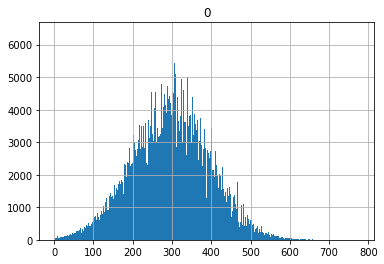

In [9]:
import pandas as pd

df = pd.read_csv('sampled_df.csv')

read_dist = []

for idx, row in df.iterrows():
    read_dist += [row[5] for i in range(row[6])]
    
read_dist_df = pd.DataFrame(read_dist)
binrange = max(read_dist) - min(read_dist)
read_dist_df.hist(bins=binrange)

### get summary statistics on the difference between observed and expected read lengths after adapters have been trimmed  
the '8' used below offsets the 'TGCA' and 'CATG' which remain after removing the adapters (which in this case don't include the RE motifs)

In [10]:
!python3 ../scripts/check_simulated_lengths.py adapted.combined.R1.fastq combined.R1.fastq 8 porifera_R1

all reads:
count    952102.000000
mean          0.226413
std           1.427725
min         -32.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         135.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    716382
1    235720
Name: contaminated, dtype: int64

reads containing missed adapters:
0    918920
1     33182
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952098
1         4
Name: false_id, dtype: int64

misidentified reads:
count    33186.000000
mean         6.495751
std          4.213998
min        -32.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        135.000000
Name: o_minus_e, dtype: float64


<AxesSubplot:>

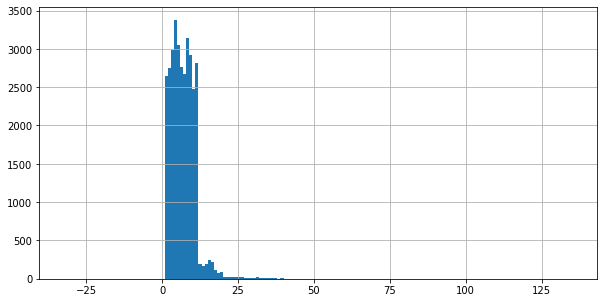

In [11]:
import pandas as pd

df = pd.read_csv('porifera_R1_misses.csv')
df.head()
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
df['o_minus_e'].hist(bins=binrange, figsize=(10,5))

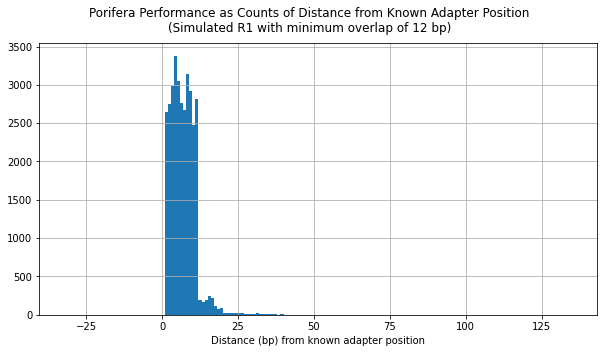

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R1_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R1 with minimum overlap of 12 bp)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('porifera_R1_misses.pdf')

In [13]:
!python3 ../scripts/check_simulated_lengths.py adapted.combined.R2.fastq combined.R2.fastq 8 porifera_R2

all reads:
count    952102.000000
mean          0.246795
std           1.582442
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         136.000000
Name: o_minus_e, dtype: float64

reads containing adapters:
0    715819
1    236283
Name: contaminated, dtype: int64

reads containing missed adapters:
0    917873
1     34229
Name: missed_id, dtype: int64

reads containing falsely-identified adapters:
0    952100
1         2
Name: false_id, dtype: int64

misidentified reads:
count    34231.000000
mean         6.864363
std          4.921888
min         -2.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        136.000000
Name: o_minus_e, dtype: float64


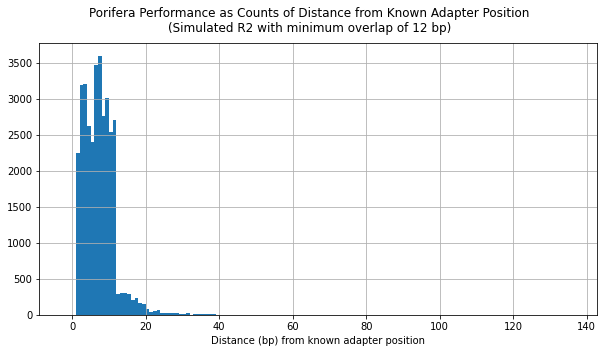

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('porifera_R2_misses.csv')
binrange = max(df['o_minus_e']) - min(df['o_minus_e'])
ax = df['o_minus_e'].hist(bins=binrange, figsize=(10,5))
plt.suptitle('Porifera Performance as Counts of Distance from Known Adapter Position\n(Simulated R2 with minimum overlap of 12 bp)')
ax.set_xlabel('Distance (bp) from known adapter position')
fig = ax.get_figure()
fig.savefig('porifera_R2_misses.pdf')